<a href="https://colab.research.google.com/github/stepsbtw/Machine-Learning/blob/main/notebooks/conformal_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição Conforme

https://arxiv.org/abs/2107.07511 -> baseado neste artigo!

- Quantis, Percentis
- Softmax Regression
- Quantile Regression

## O que é a predição conforme?
Uma maneira de **quantificar a incerteza** de tarefas de aprendizado supervisionado. Gerando **intervalos de predição** para um certo **nível de confiança**.

- Intervalo de Predição (para um exemplo) indica o range de possíveis saídas daquela predição.

- A largura deste intervalo é determinado pelo **nível de confiança** $(1-α)$.
  - Quanto menor for este intervalo, maior a confiança.

$$Pr(\text{conter o target}) \geq{1-α}$$



### Percentil
Um percentil indica uma porcentagem de dados que são iguals ou menor que um valor dado no dataset.

- Exemplos:
  - A **mediana** é o valor com 50% das observações a sua esquerda.
  - O **primeiro quartil** é o valor com 25% dos valores a sua esquerda.
  - O **terceiro quartil** é o valor com 75% dos valores a sua esquerda.
  - O **décimo percentil** é o valor com 10% das observações a sua esquerda.

### Quantil
O quantil é o mesmo que um percentil, mas ao invés de falar do percentil 10, queremos o quantil 0.1 (é uma proporção).

- Exemplos:
  - A mediana é o quantil 0.5
  - O primeiro quartil (percentil 25), é o 0.25 quantil

## Q-Quantil
O q-ésimo quantil de um dataset é o valor que divide os dados em duas partes:
- Uma parte contendo a fração q de menores dados
- Outra contendo a fração restante (1-q).

Um problema frequente é **estimar o quantil** de uma população (muito grande ou infinita) a partir de uma amostra finita de tamanho $n$

- Existem algoritmos que fazem isso.
  - Na wikipedia existem **nove** diferentes tipos de **sample quantiles** juntos com as fórmulas para calculá-los.

In [ ]:
import numpy as np

data = np.array([.05, .09, .20, .18]) # dados previstos

# computar o décimo percentil
percentil_10 = np.quantile(data, 0.1, method = "lower")

## Softmax Regression

Também conhecida como "Regressão Logística Multinomial".

É um tipo de regressão usada para problemas de **classificação**, onde as variáveis são **categóricas** com mais de duas classes.

- Extende a regressão logística para lidar com múltiplas classes. ( ao invés de 0-1 )

- O objetivo é predizer a **probabilidade** de um input pertencer de cada classe específica.


# Função SoftMax
Transforma os dados brutos de output (logits) em probabilidades.

## Quantile Regression

Técnica estatística usada para estimar a relação entre variáveis independentes e uma variável dependente. ( Em diferentes quantis de uma distribuição condicional de uma variável dependente ).

- Estima **diferentes quantis** da distribuição condicional, dando uma visão mais ampla do relacionamento.
  - Diferente da regressão **mínimos quadrados**, que estima a **média** condicional da variável dependente dadas variáveis independentes.

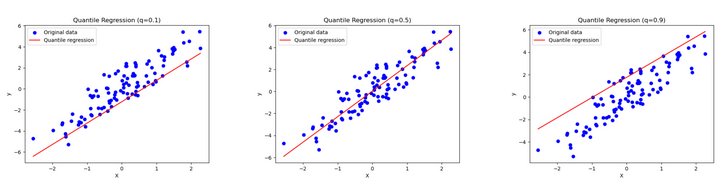

# Predição Conforme para Classificacão

1. Comece com um modelo h(x) pré-treinado, usando qualquer algoritmo de aprendizado e qualquer dataset.
2. Crie **conjuntos de predição** (um set de labels possiveis) para este modelo usando uma quantidade pequena de dados de calibração adicionais.

A ideia básica da predição conforme é usar o dataset de calibração para efetuar um procedimento estatístico que aprende como produzir esses conjuntos de predição.

## Exemplo:
Três entradas progressivamente mais difíceis da classe "fox squirrel" e os conjuntos de predição gerados pela predição conforme.

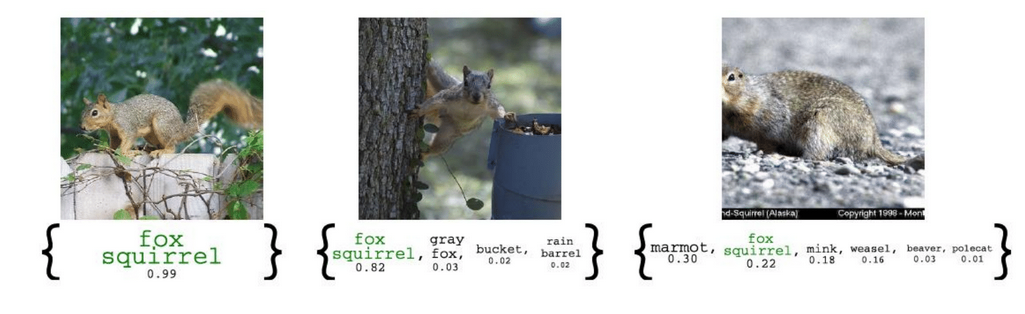

## Formulação do problema:

### Dados:
- Nível de confiança: $(1-α)$
- Dataset de calibração: $\{(x_i, y_i)\}^n_{i=1}$
- Modelo que produz: $$Pr(Y=c_j | X=x)\text{, for } Y ∈ \{c_1,c_2,⋯,c_k\}: h(x)$$

### Objetivo:

Para um novo exemplo $x_{test}$, computar o set de predição:

$$C(x_{test}) ⊆ \{c_1,c_2,⋯,c_k\}\text{ sujeito a }Pr(y_{test} ∈ C(x_{test})) \geq{1-α}$$


## Passo a passo:

1. Splittar os dados: ($D_{train}, D_{calib}, D_{train}$)
2. Treinar o modelo com base no $D_{train}$
3. Computar os scores de **não conformidade** $\{s_i\}^n_{i=1}\text{ em } D_{calib}$
4. Computar o quantil $(1-\alpha)$
5. Aplicar no $D_{test}$
6. Avaliar a performance (opcional)

## Scores de Não-conformidade
Considere um modelo de classificação produzido a partir dos softmax scores (probabilidade multiclasse) para uma entrada (de calibração) $x_i$

Considere também que $c_4$ é a classe correta.
- O modelo classificou errado $x_i$ como $c_3$

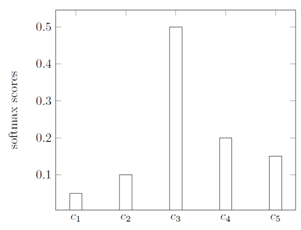

- Definimos $s_i$ o score de não conformidade do exemplo $x_i$.

$$
s_i = 1 - Pr(\text{correct class})
$$

Como temos n exemplos de calibração, temos o conjunto de scores: ${s_i}^n_{i=1}$

## Computar o quantil de confiança
Consideridere que $(1-\alpha)$ é 0.1 (10%)

- Computamos $\hat{q}$ a estimativa do 0.1 quantil dos scores softmax.

In [ ]:
import numpy as np

data = np.array([.07, .09, .12, .15, .20, .23, .25, .27, .30, .33, .34, .35, .40, .42, .45, .47, .5, .55, .8])
p10 = np.quantile(data, 0.1, method = "lower")
print(p10)

0.09


Nesse exemplo $n= 20$
- Uma fração de 0.1 dos exemplos estão abaixo de 0.09.

Conforme $n\to{\inf}$ a aproximação fica cada vez mais precisa.

- Mas conforme $n\to{\inf}$, $(1-\alpha)$% dos scores de todos os exemplos estariam abaixo do quantil $(1-\alpha)$

- Presumindo que os dados sejam AAS (Amostragem aleatória e independente)

Na prática, não temos dados infinitos, é por isso que $\hat{q}$, o valor é uma aproximação.

## Aplicar à exemplos de teste
Etapa de predição!

- Para criar um conjunto de predição para o novo exemplo $x_{test}$:
1. Produza os scores softmax computando $h(x_{test})$
2. Separe os labels **plausíveis o suficiente** for $x_{test}$, isto é, com um valor de não-conformidade menor que $\hat{q}$

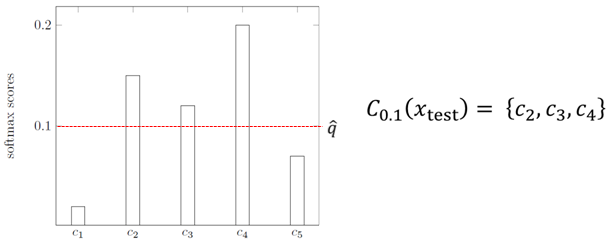

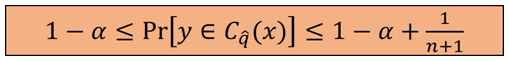

# Predição Conforme para Regressão

## Passo a passo:

1. Splittar os dados: ($D_{train}, D_{calib}, D_{train}$)
2. Treinar o modelo com base no $D_{train}$
3. Computar os scores de **não conformidade** $\{s_i\}^n_{i=1}\text{ em } D_{calib}$
4. Computar as estimativas para o quantil $(1-\alpha)$
5. Aplicar no $D_{test}$
6. Avaliar a performance (opcional)

## 1) Treine funções quantil

Usando **algum** algoritmo de Regressão Quantílica, treine duas funções condicionais de quantil ($\hat{q}_{\alpha_{lo}}$ e $\hat{q}_{\alpha_{hi}})$

- Feito no próprio dataset de treino, não no de calibração.

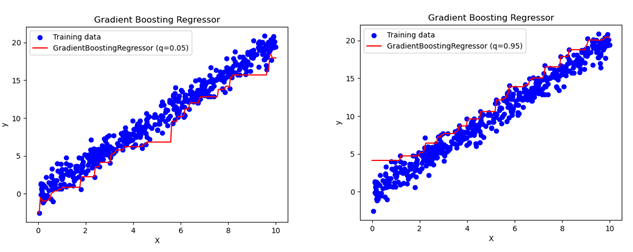

In [ ]:
# Quantile Regression no quantil 0.95
hi = 0.95
quant_reg = GradientBoostingRegressor(loss="quantile", alpha=hi)
hi_model = quant_reg.fit(X_train, y_train)

lo = 0.05
quant_reg = GradientBoostingRegressor(loss="quantile", alpha=lo)
lo_model = quant_reg.fit(X_train, y_train)


## 2) Valor de não conformidade
Uma função que indica o quão "raro" uma observação é, comparado ao resto dos dados.

- Essa função normalmente usa a predição do modelo.

Uma possibilidade é:

$E_i = max\{\hat{q}_{\alpha lo}(x_i) - y_i, y_i - \hat{q}_{\alpha hi}\}$

É a medida de conformidade usada na **Conformalized Quantile Regression**

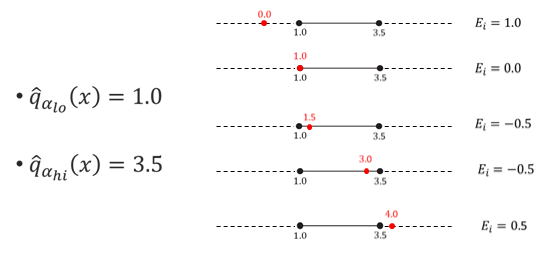

##3) Computar o Quantil Empírico

Usa os scores de conformidade computados anteriormente no dataset de calibração

$Q_{1-\alpha} = (1-\alpha)(1+\frac{1}{n})$-ésimo quantil empirico de $\{E_i: i \in X_{calib}\}$

##4) Criar o intervalo de predição

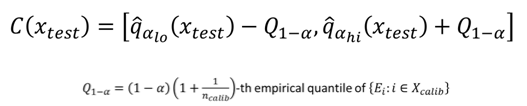